<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1605139200&v=beta&t=opmJLG_veDflQesF9uJvIhSXbmwPY3DGSlbZo1v-w2k" width="1000"></center>

# SDC Certified Program in Python for Data Science

## Tema 1. Métodos de particionamiento: caso práctico sobre segmentación Uber

### Prof. Manuel Sigüeñas, M.Sc.(c) 

[Perfil](https://socialdata-peru.com/learning/teacher2.php)

### Prof. Lenguajes de Programación para Ciencia de Datos / Agile Data Scientists / SCRUMStudy Certified Trainer


[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)

## Informacion de los atributos

Algunos datos básicos sobre sus clientes, son:

1) Date/Time-La fecha de solicitud de carros

2) Lat-Latitud

3) Lon-Longitud

4) Base-Codigo del Distrito

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import os

In [2]:
data = pd.read_csv('D:/Python/2. Nivel II/2/datos/uber-raw-data-apr14.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [4]:
data.head(10)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512
7,4/1/2014 0:45:00,40.7620,-73.9790,B02512
8,4/1/2014 0:55:00,40.7524,-73.9960,B02512
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512


In [5]:
#Eliminar las columnas de Date y Base
data.drop(['Date/Time', 'Base'], #drop para eliminar filas o columnas
          axis=1, inplace=True) #atributo axis = 1, parámetro "1" indica que la eliminación se dará por columna

In [7]:
#Verificar la existencia de nulos
data.isnull().sum() #isnull: función que verifica la existencia de valores nulos.

Lat    0
Lon    0
dtype: int64

In [8]:
X = data

In [9]:
cols = X.columns #optener los valores de la calumnas del data frame
cols

Index(['Lat', 'Lon'], dtype='object')

In [10]:
from sklearn.preprocessing import MinMaxScaler
#utilizamos el módulo preprocessing para importar la función MinMaxScaler

ms = MinMaxScaler() #objeto ms guarda la función
X = ms.fit_transform(X) #fit_transform aplica la función a los datos X

In [11]:
X = pd.DataFrame(X, columns=[cols])

In [12]:
X.head()

,Lat,Lon
0,0.340608,0.302361
1,0.319910,0.272952
2,0.322308,0.290391
3,0.335617,0.293974
4,0.335910,0.295969


## Numero Optimo de Cluster

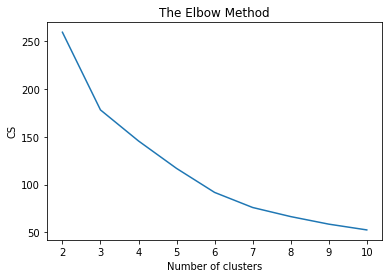

In [13]:
from sklearn.cluster import KMeans #importamos la función KMeans del módulo cluster
cs = [] #cs: es un objeto tipo lista vacío
for i in range(2, 11): #generamos el bucle que indica que "i" tomará valores de 2 hasta 11
    kmeans = KMeans(n_clusters = i, #indicando los parámetros que se usarán para la función KMeans
                    init = 'k-means++', 
                    max_iter = 300, 
                    n_init = 10, 
                    random_state = 0)
    kmeans.fit(X) #.fit() aplica la función a los datos X
    cs.append(kmeans.inertia_) #agregamos a nuestro objeto cs los valores que se generan en el bucle
plt.plot(range(2, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [19]:
cs

[259.6134218540137,
 178.25173815485405,
 145.71779890572756,
 116.96822408976581,
 91.81956276277307,
 76.0264223705671,
 66.4965182582137,
 58.59163705305676,
 52.53611038276176]

## Método de Silueta para encontar el número óptimo de clusters

In [20]:
from sklearn.metrics import euclidean_distances, silhouette_score

In [ ]:
sil = []

for i in range(2,6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    sil.append(silhouette_score(X, #datos
                                kmeans.fit_predict(X))) #etiqueta de clúster a la cual pertenecen las observaqciones

plt.plot(range(2,6),#eje x
         sil)# eje y
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette para data Uber")

## Modelo k-means

In [14]:
km = KMeans(n_clusters = 3, #k óptimo = 3
            init = 'k-means++', 
            max_iter = 300, 
            n_init = 10, 
            random_state = 0)
y_means = km.fit_predict(X)
#Los valores de X
x=X.values

In [15]:
y_means

array([1, 0, 0, ..., 0, 0, 0])

## Visualizacion de Cluster

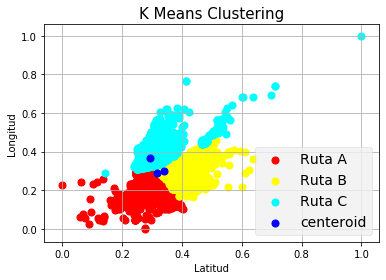

In [16]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'red', label = 'Ruta A')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow', label = 'Ruta B')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan', label = 'Ruta C')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 15)
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.legend()
plt.grid()
plt.show()

## Perfilamiento de Clúster

In [17]:
cl_k_means= pd.DataFrame(y_means, columns=["clúster_kmeans"])
cl_k_means.head()

,clúster_kmeans
0,1
1,0
2,0
3,1
4,1


In [18]:
data2 = pd.read_csv('D:/Python/2. Nivel II/2/datos/uber-raw-data-apr14.csv')

In [19]:
data2_new = pd.concat([data2, cl_k_means], axis=1)
data2_new.head()

,Date/Time,Lat,Lon,Base,clúster_kmeans
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,1
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,1
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,1
